# Classification with SVM's
You will be using the Iris dataset from sklearn

In [1]:
from sklearn.datasets import load_iris

iris_df =  load_iris(as_frame=True).frame
iris = load_iris()
X_original = iris.data
y_original = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Your objectives are available in the README.md file accompanying this notebook

I will be providing a jupyter file with headers for where you can insert your answers for each question

Below we will be going over the following to help you with the Lab:

Classification with SVM's:
- How to implement the svm algorithm with sklearn
  - How to set kernel to "linear", "poly", "rbf"
  - How to set the C. (inverse of regularization)
  - How to set the gamma 
  - How to set degree and coef0 for "poly" kernel
- How to set startify when splitting your data using train_test_split from sklearn
- How to calculate hinge loss on classification
- How to plot decision boundary for multiclassification in 2D
  - How to encircle your support vectors from your svm
- The easiest way to remove labels of 2 from your input data(X) and targets(y) (Making your problem a binary classification problem)
- How to Plot 3D graph that uses a hyperplane to seperate 2 points

## Below is our sample data for the demonstration (Dimensionality Reduction)

In [2]:
import numpy as np
import pandas as pd

X_clf = np.array([[-1, -1, 1, 5, 7], [-2, -1, 0, 9, 8], [1, 1, 3, 6, 4], [2, 1, 3, 4, 6], [-2, -1, 0, 6, 8], [-2, -9, 0, 3, 7],[-2, -4, 0, 7, 7], [-5, -1, 0, 5, 8], [-2, -1, 0, 3, 7], [-2, -1, 7, 3, 7], [-4, -1, 5, 3, 9], [1, 2, 6, 7, 9]])
Y_clf = np.array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])
X_y_df_clf = pd.DataFrame(np.array(np.transpose([X_clf[:,0], X_clf[:,1],X_clf[:,2], X_clf[:,3], X_clf[:,4], Y_clf])), columns=["x1", "x2", "x3", "x4", "x5", "y"])
X_y_df_clf

,x1,x2,x3,x4,x5,y
0,-1,-1,1,5,7,0
1,-2,-1,0,9,8,0
2,1,1,3,6,4,1
3,2,1,3,4,6,1
4,-2,-1,0,6,8,0
5,-2,-9,0,3,7,1
6,-2,-4,0,7,7,1
7,-5,-1,0,5,8,1
8,-2,-1,0,3,7,0
9,-2,-1,7,3,7,0


***Note***: Here I am selecting the first 2 features from my dataset
  - WHEN YOU ARE PLOTTING YOUR 2D GRAPH YOUR FEATURES MUST COME FROM FEATURE SELECTION
  - WHEN YOU ARE PLOTTING YOUR 3D GRAPH, YOU SHOULD SELECT THE FIRST 3 FEATURES THE WAY I AM SELECTING MINE BELOW

In [3]:
X_clf_2D = X_clf[:,:2]
X_new_3d = X_clf[:,:3]

## How to implement the svm algorithm with sklearn
- How to set linear kernel
- How to set C (Inverse of regularization)

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0)

***kernel:*** This is the kernel that will be used for the svm <br>
***C***: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

- How to set poly kernel
    - How to set degree and coef0 and gamma

In [5]:
model = SVC(kernel='poly', C=1.0, degree=3, coef0=0.0, gamma="scale")
clf = model.fit(X_clf_2D, Y_clf)

***degree***: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. It is d in (axb+r)^d<br>
***coef0***:  Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.(But we are not using sigmoid in this lab). It is r in (axb+r)^d

- How to set rbf kernel

In [6]:
model = SVC(kernel='rbf', C=1.0, gamma="scale")
clf = model.fit(X_clf_2D, Y_clf)

## How to set startify when splitting your data using train_test_split from sklearn

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clf_2D, Y_clf, test_size=0.25, random_state=0, stratify=Y_clf)

In [8]:
print(f"Training examples target classes: {y_train}")

Training examples target classes: [1 1 0 1 0 0 0 1 1]


In [9]:
print(f"Testing examples target classes: {y_test}")

Testing examples target classes: [1 0 0]


Stratify tries to ensure that you get balanced classes in your training and test sets from your split

## How to calculate hinge loss on classification

In [10]:
from sklearn.metrics import  hinge_loss

hinge_loss_train = hinge_loss(y_train, clf.decision_function(X_train))

print(f"Training hinge loss: {hinge_loss_train}")

Training hinge loss: 6.874809775019802e-05


## How to plot decision boundary for multiclassification in 2D
- How to encircle your support vectors from your svm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


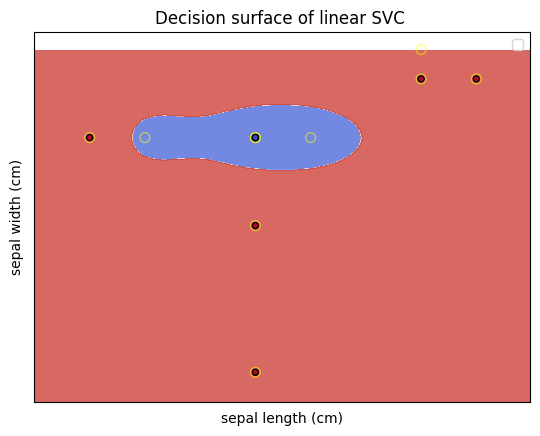

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)



plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

***Note:*** I have also added the code for encircling the support vectors above

## The easiest way to remove labels of 2 from your input data(X) and targets(y) (Making your problem a binary classification problem)

In [12]:
import copy

#make it binary classification problem
y_new_3d = copy.deepcopy(Y_clf)
X_new_3d = X_new_3d[np.logical_or(Y_clf==0,Y_clf==1)]
y_new_3d = y_new_3d[np.logical_or(Y_clf==0,Y_clf==1)]

What I am doing here is picking only classes with 0 or 1 as labels. It does not make much sense for me here since I have only 2 classes with labels 0 and 1. However when you are implementing this. It should filter out all your classes with label=2

## How to Plot 3D graph that uses a hyperplane to seperate 2 points

In [13]:
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_new_3d, y_new_3d, test_size=0.25, random_state=0)

Notice here while splitting the data for binary classification, I do not use stratify. That is because I do not have enough examples to have it make sense. You on the other hand **MUST** use stratify when splitting your data for the 3d graph

In [14]:
model = SVC(C=1, kernel='linear')
clf = model.fit(X_train_3d, y_train_3d)

Notice here I am fitting the model on the binary classification problem

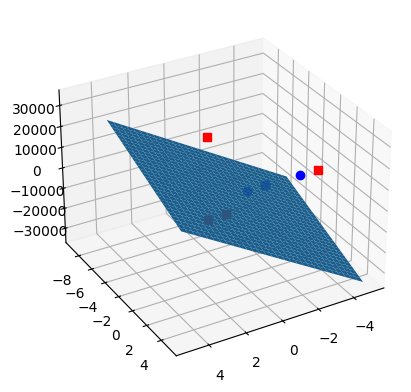

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train_3d[y_train_3d==0,0], X_train_3d[y_train_3d==0,1], X_train_3d[y_train_3d==0,2],'ob')
ax.plot3D(X_train_3d[y_train_3d==1,0], X_train_3d[y_train_3d==1,1], X_train_3d[y_train_3d==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [16]:
from sklearn.metrics import  hinge_loss

hinge_loss_test = hinge_loss(y_train_3d, clf.decision_function(X_train_3d))

print(f"Training hinge loss: {hinge_loss_test}")

Training hinge loss: 0.5695442150937753


Here I am calculating the loss on the test set from the split of my binary classification problem

# Conclusion
So after you completed the lab, did you notice a few things?
For instance:
  - Did you notice that the encircled support vectors were usually closest to the decision boundary
  - Did you notice that When we set C really small, we underfit and almost every value in our dataset became a support vector
    - Did you notice the really bad accuracy and loss we got for both 3d(Binary classification with 3 features) and 2d(Multiclass classification with 2 features)?
  - Did you notice that when C was large, we ended up with less support vectors (Hence a stricter margin and decision boundary) 
  - Did you find the 2d plane in 3d space pretty cool?
  - Did you notice that the "poly" kernel with degree=2 gave a really weird complex decision boundary but the degree=3 poly kernel gave a slightly curved but better decision boundary despite degree=3 being the more complex function?
  - Did you notice that the "rbf" kernel gave a decision boundary that solves the problem in an interesting way, with just enough complexity.